In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras

import cirq
import sympy
import numpy as np
import collections

# visualization tools
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [2]:
#physical_devices = tf.config.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

import tensorflow_quantum as tfq

2022-05-31 13:39:28.046509: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [104]:
mat = np.load("./proj_raw_data_train_0.npz")['arr_0'] # change path to your data

In [105]:
mat[np.isnan(mat)] = 0

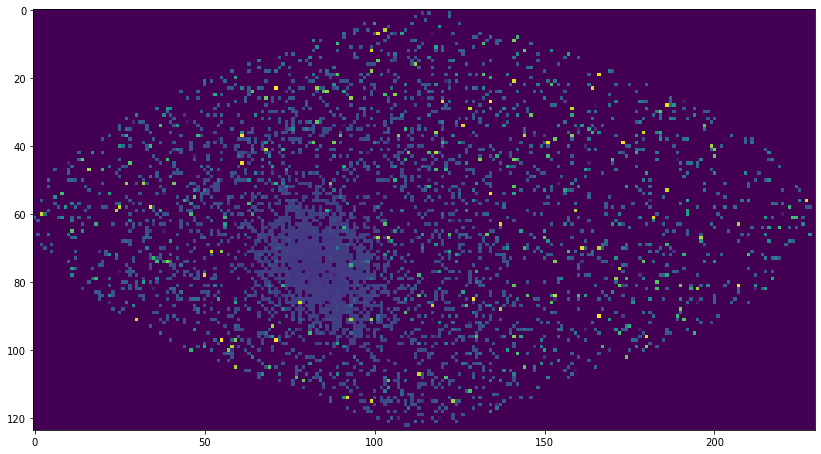

In [110]:
ev = 1

fig = plt.figure(figsize=(14,14))
plt.imshow(mat[ev,:,:,1].T)

In [ ]:
input_shape = (230, 124)


In [135]:
def conv_juno(in_matrix, kernel_size, input_shape=(230, 124)):
    """Convolves the input image to reduce size"""
    '''k_s_0 = input_shape[0] - out_shape[0]*stride[0] + 1*stride[0]
    k_s_1 = input_shape[1] - out_shape[1]*stride[1] + 1*stride[1]
    kernel_size = (k_s_0, k_s_1)'''
    stride = kernel_size

    out_shape = np.zeros(2).astype(int)
    out_shape[0] = int((input_shape[0]-kernel_size[0])/stride[0] + 1)
    out_shape[1] = int((input_shape[1]-kernel_size[1])/stride[1] + 1)
    
    out_matrix = np.zeros((out_shape[0], out_shape[1], 2))

    # Loop over the image
    for j in range(0, input_shape[0] - kernel_size[0] + 1, stride[0]):
        for k in range(0, input_shape[1] - kernel_size[1] + 1, stride[1]):
            out_matrix[j  // stride[0], k  // stride[1], 0] = np.sum(in_matrix[j:j+kernel_size[0], k:k+kernel_size[1], 0])
            weights = in_matrix[j:j+kernel_size[0], k:k+kernel_size[1], 0]
            elements = in_matrix[j:j+kernel_size[0], k:k+kernel_size[1], 1]
            out_matrix[j  // stride[0], k  // stride[1], 1] = np.sum(np.multiply(elements, weights))/np.sum(weights) \
                                                              if np.sum(weights) != 0 else 0
    return out_matrix

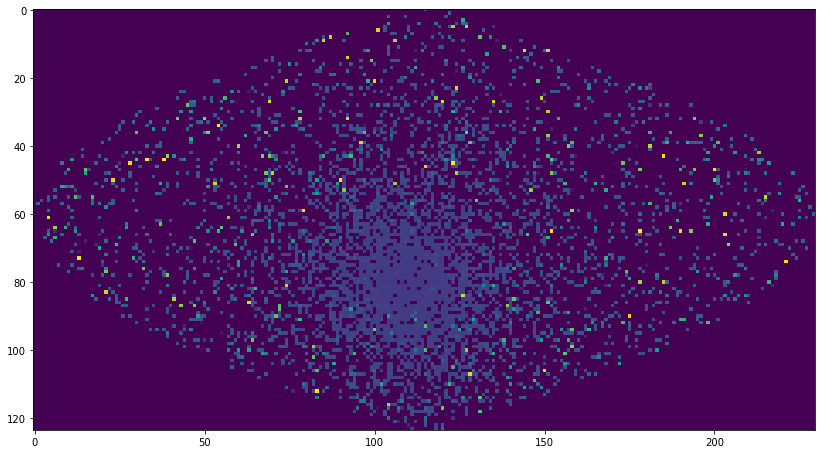

In [143]:
fig = plt.figure(figsize=(14,14))
plt.imshow(mat[ev,:,:,1].T)

In [153]:
ev = 2
conv_mat = conv_juno(mat[ev], (6, 6))

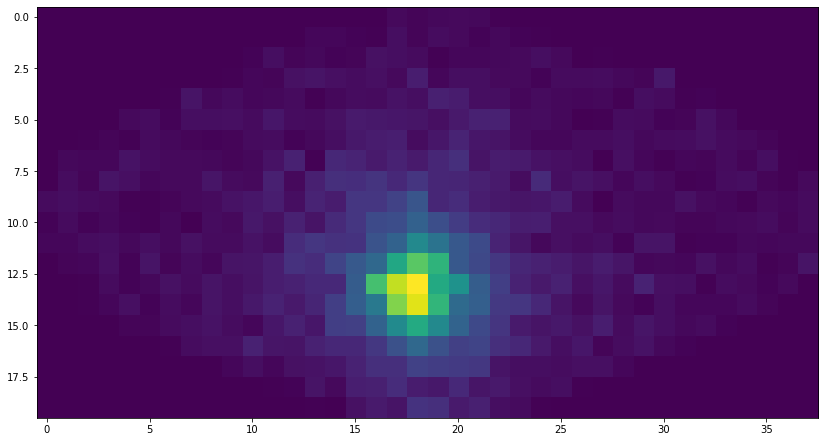

In [155]:
fig = plt.figure(figsize=(14, 14))
plt.imshow(conv_mat[:,:,0].T)

In [149]:
conv_mat.shape

(57, 31, 2)